# **DA5401 ASSIGNMENT-4** 
#### Author: *Vishwanath Vinod* (EE22B002)
#### Date:    15th September 2025

#### **IMPORTS**

In [1]:
# install imbalanced learning library
# ! pip install imbalanced-learn

import os
import ast
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.pipeline import make_pipeline
from sklearn.mixture import GaussianMixture
import matplotlib.patches as mpatches
from imblearn.under_sampling import ClusterCentroids
import seaborn as sns
sns.set_style('dark')

## **A. DATA EXPLORATION AND BASELINE MODEL** 

### **A.1 EXPLORATORY DATA ANALYSIS**

1. Load and analyze the creditcard.csv file as the dataset.
2. Print the class distribution of the data and visualize it via plots.

In [2]:
# Read input dataset and visualize
df = pd.read_csv('./creditcard.csv')
print("Dataset shape: {}".format(df.shape))
print("Columns: {}".format(df.columns.tolist()))
# Standardize the 'Amount' and 'Time' column
df['Amount'] = StandardScaler().fit_transform(df[['Amount']])
df['Time'] = StandardScaler().fit_transform(df[['Time']])
# visualize some entries of the dataset
df[:10]

Dataset shape: (284807, 31)
Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
5,-1.996541,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.338556,0
6,-1.996499,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.333279,0
7,-1.996436,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,-0.190107,0
8,-1.996436,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.019392,0
9,-1.996394,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.338516,0


#### **ANALYZE CLASS IMBALANCE**

In [3]:
print("\nClass Distribution:")
class_counts = np.unique(df['Class'], return_counts=True)
for i in range(len(class_counts[0])):
    print('Count of Class {}: {}'.format(class_counts[0][i], class_counts[1][i]))
print(f"Fraud percentage: {class_counts[1][1]/len(df)*100:.2f}%")


Class Distribution:
Count of Class 0: 284315
Count of Class 1: 492
Fraud percentage: 0.17%


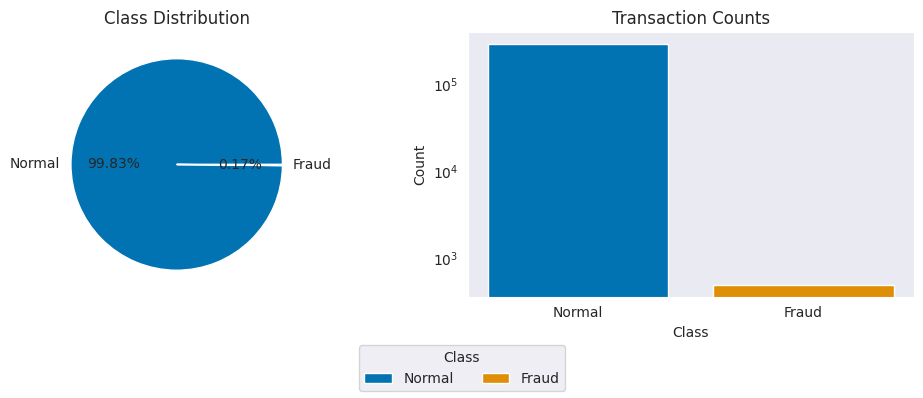

In [4]:
# Use colorblind-friendly palette
colors = sns.color_palette("colorblind")[:2]  # first two colors

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Pie chart
axes[0].pie(class_counts[1], labels=['Normal', 'Fraud'], colors=colors, autopct='%1.2f%%')
axes[0].set_title('Class Distribution')

# Bar chart
bars = axes[1].bar(['Normal', 'Fraud'], class_counts[1], color=colors)
axes[1].set_title('Transaction Counts')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].set_yscale('log')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Normal', 'Fraud'])

# Add a single legend at the bottom
fig.legend(bars, ['Normal', 'Fraud'], title="Class", loc='lower center', ncol=2)

plt.tight_layout(rect=[0, 0.1, 1, 1])  # leave space at the bottom for legend
plt.show()


### **BASELINE MODEL**

1. Split the original dataset into training and testing sets ensuring the test set retains its original imbalance.
2. Train a Logistic Regression Classifier on this imbalanced training data.
3. Evaluate the performance on the test data via a classification report.

**TRAIN-TEST SPLIT**

In [5]:
X = df.drop('Class', axis=1)
X = StandardScaler().fit_transform(X)
y = df['Class']

# Split data - use stratified sampling to maintain original imbalance in test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

print(f"\nTrain set: {X_train.shape}, Fraud: {sum(y_train)}/{len(y_train)} ({sum(y_train)/len(y_train)*100:.2f}%)")
print(f"Test set: {X_test.shape}, Fraud: {sum(y_test)}/{len(y_test)} ({sum(y_test)/len(y_test)*100:.2f}%)")


Train set: (227845, 30), Fraud: 394/227845 (0.17%)
Test set: (56962, 30), Fraud: 98/56962 (0.17%)


**LOGISTIC REGRESSION PERFORMANCE**

In [22]:
model1 = LogisticRegression(random_state=42, max_iter=5000)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

print("\nModel 1 (Baseline) Performance:")
print(classification_report(y_test, y_pred1))


Model 1 (Baseline) Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [23]:
precision1, recall1, f1_1, _ = precision_recall_fscore_support(y_test, y_pred1, labels=[1], average=None)
baseline_metrics = {'Precision': precision1[0], 'Recall': recall1[0], 'F1': f1_1[0]}
print(baseline_metrics)

{'Precision': 0.8289473684210527, 'Recall': 0.6428571428571429, 'F1': 0.7241379310344828}


## **B. GAUSSIAN MIXTURE MODEL FOR SYNTHETIC SAMPLING**

#### **B.1 Why GMM?**

- **SMOTE (Synthetic Minority Over-sampling Technique)** 
1. Assumes that the minority class distribution is locally linear and continuous.
2. Find the k-nearest neighbours for each minority sample.
3. Creates new samples by interpolating between existing minority class samples and their nearest neighbors. 
4. In overlapping and boundary regions, SMOTE may generate noisy samples and thus fail to capture the correct data distribution.

- **GMM (Gaussian Mixture Model)-based sampling**
1. Gaussian Mixture Modelling (GMM) is a probabilistic model that represents a dataset as a combination (mixture) of several Gaussian distributions, each capturing a cluster or subgroup within the data. Thus it fits the minority class data using a probabilistic model composed of multiple Gaussian distributions.
2. It helps capture the underlying data distribution accurately.
3.  Each component models a potential cluster within the minority class from which new samples can be drawn.
4. The shape and spread of each cluster is captured through covariance modelling.



**Why GMM is theoretically better**
1. **Capturing complex structures:**  
   When the minority class exhibits complex shapes or multiple sub-groups in feature space, SMOTE may oversimplify by forcing linear interpolations between neighbors. GMM, however, explicitly learns a density function that reflects these structures, leading to synthetic samples that are more faithful to the original data distribution and less likely to introduce noise or class overlap.

2. **Handling overlapping/boundary regions:**  
   In overlapping and boundary regions, SMOTE may generate noisy or misleading samples since it does not model the underlying probability distribution. GMM instead accounts for uncertainty through its probabilistic formulation, which reduces the risk of creating unrealistic synthetic points.

3. **Probabilistic cluster assignment and flexible cluster shapes:**  
   GMM assigns data points to clusters probabilistically, allowing samples to belong partially to multiple components rather than being forced into a single cluster. This soft assignment enables better modeling of ambiguous cases. Moreover, GMM supports ellipsoidal clusters of varying orientations and shapes, making it more flexible in capturing the true geometry of the minority class.


#### **B.2 Optimal Number of Components in GMM**

- To determine the optimal number of components in a Gaussian Mixture Model, model selection criteria such as the **Akaike Information Criterion (AIC)** and the **Bayesian Information Criterion (BIC)** are commonly used. These criteria trade off goodness of fit against model complexity, penalizing over-parameterization while favoring models that best explain the data.
- But BIC penalizes model complexity more heavily thus preferring simpler models.
- For synthetic sampling of the minority class, **BIC is the better metric** since it favors simpler models and reduces overfitting on limited data (minority class has very few samples).


**BIC Plot for Optimal Number of Components in GMM**

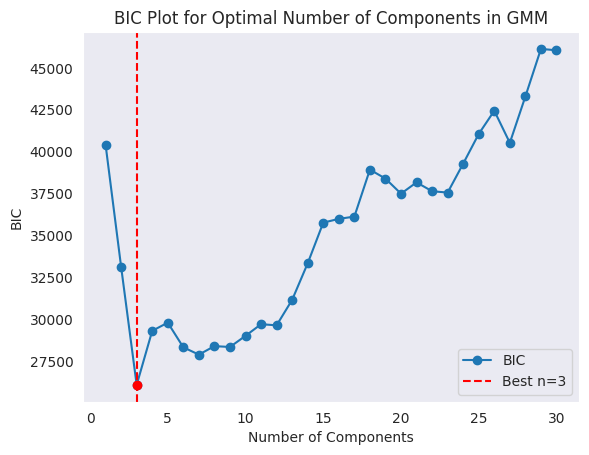

Optimal number of components (by BIC): 3


In [7]:
X_minority_train = X_train[y_train == 1]
n_components = np.arange(1, 31)
models = [GaussianMixture(n, covariance_type='full', random_state=42).fit(X_minority_train)
          for n in n_components]
bics = [m.bic(X_minority_train) for m in models]
best_n = n_components[np.argmin(bics)]
best_bic = np.min(bics)

# Plot BIC curve
plt.plot(n_components, bics, label='BIC', marker='o')
plt.axvline(best_n, color='r', linestyle='--', label=f'Best n={best_n}')
plt.scatter(best_n, best_bic, color='red', zorder=5)
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.title('BIC Plot for Optimal Number of Components in GMM')
plt.legend()
plt.show()

print("Optimal number of components (by BIC):", best_n)

**OBSERVATION**

The optimal number of components in GMM is 3.

**Fitting GMM for the minority class with 3 components**

In [8]:
gmm = GaussianMixture(n_components=3).fit(X_minority_train)
labels = gmm.predict(X_minority_train)
print(gmm.converged_)

True


#### **B.3 Synthetic Data Generation -GMM**

**How synthetic data generation works for GMM?**

GMM represents data as a mixture of multiple Gaussian distributions (components). To sample:

- Pick a component: Randomly choose one of the Gaussian components based on their weights
- Sample from it: Generate a point from that chosen Gaussian using its mean and covariance

Its essentially picking which "cluster" to sample from, then drawing a random point from that cluster's distribution.

**NUMBER OF SYNTHETIC DATA POINTS**

We need to balance the dataset so we need to generate samples until majority class and minority class have same number.

In [9]:
X_majority_train = X_train[y_train==0]
num_samples_gmm = X_majority_train.shape[0] - X_minority_train.shape[0]
print(f"Number of Synthetic Samples to be generated: {num_samples_gmm}")

Number of Synthetic Samples to be generated: 227057


**GENERATING AND COMBINING SYNTHETIC DATA**

Generate 227057 samples from the minority class to balance the dataset.

In [10]:
#Generaate Synthetic Data
data_new,_ = gmm.sample(num_samples_gmm)
label_new =  np.ones(num_samples_gmm, dtype=int) # Minority class

# Combine synthetic data with the original training set
X_train_gmm = np.vstack((X_train, data_new))
y_train_gmm = np.hstack((y_train, label_new))

# Display class statistics after balancing
print(f"\nClass distribution after balancing: {X_train_gmm.shape}, Fraud: {sum(y_train_gmm)}/{len(y_train_gmm)} ({sum(y_train_gmm)/len(y_train_gmm)*100:.2f}%)")


Class distribution after balancing: (454902, 30), Fraud: 227451/454902 (50.00%)


#### **B.4 Rebalancing with CBU**

CBU (Clustering Based Undersampling) attempts to balance classes by:

- Clustering majority class to find sub-groups
- Undersampling within each cluster to preserve local structure

This method helps preserve majority class distribution while reducing size of the class.

**ELBOW METHOD FOR NUMBER OF CLUSTERS OF MAJORITY GROUP**

Optimal Number Of Clusters of Majority Group: 13


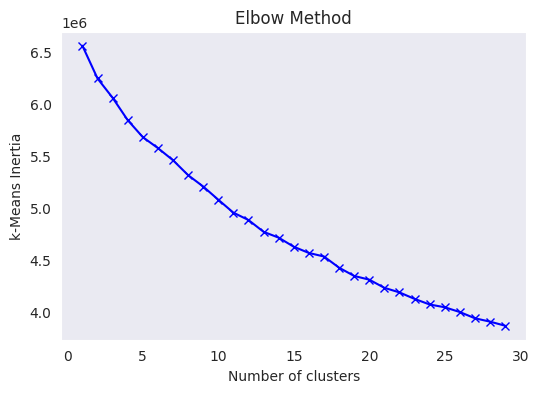

In [12]:
# majority data
majority_samples = X_train[y_train == 0]

inertia = []
K_range = range(1, 30)  # try k=1 to 14

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(majority_samples)
    inertia.append(kmeans.inertia_)

# KneeLocator for Optimal Number of Clusters
knee_locator = KneeLocator(K_range, inertia, curve='convex', direction='decreasing')
optimal_k = knee_locator.knee

print(f"Optimal Number Of Clusters of Majority Group: {optimal_k}")
# plot elbow curve
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('k-Means Inertia')
plt.title('Elbow Method')
plt.show()

**CBU BASED RESAMPLING OF MAJORITY TO DESIRED POPULATION**

Here we reduce the majority  to thrice the size of minority class. 

This is a heuristic choice which is backed by the fact that majority class is lot more in number than the minority class.

In [27]:
n_minority = np.sum(y_train == 1)
n_majority_target = 2 * n_minority   # keep majority = 2 × minority

kmeans = KMeans(n_clusters=13, random_state=42)
cbu = ClusterCentroids(
    estimator=kmeans,
    sampling_strategy={0: n_majority_target}, 
)
X_train_cbu, y_train_cbu = cbu.fit_resample(X_train, y_train)

# After CBU stats
n_minority = np.sum(y_train_cbu == 1)
n_majority = np.sum(y_train_cbu == 0)
print(f"After CBU: majority={n_majority}, minority={n_minority}")

After CBU: majority=788, minority=394


**GMM BASED SYNTHETIC DATA GENERATION**

In [32]:
#Generaate Synthetic Data
gmm_cbu = GaussianMixture(n_components=3).fit(X_train_cbu)
labels = gmm_cbu.predict(X_train_cbu)
num_samples_cbu = 1*n_minority
data_new,_ = gmm_cbu.sample(num_samples_cbu)
label_new =  np.ones(num_samples_cbu, dtype=int) # Minority class

# Combine synthetic data with the original training set
X_train_cbu_gmm = np.vstack((X_train_cbu, data_new))
y_train_cbu_gmm = np.hstack((y_train_cbu, label_new))

# Display class statistics after balancing
print(f"\nClass distribution after balancing: {X_train_cbu_gmm.shape}, Fraud: {sum(y_train_cbu_gmm)}/{len(y_train_cbu_gmm)} ({sum(y_train_cbu_gmm)/len(y_train_cbu_gmm)*100:.2f}%)")


Class distribution after balancing: (1576, 30), Fraud: 788/1576 (50.00%)


## **C. PERFORMANCE EVALUATION AND COMPARISON**

Perform logistic regression on the GMM-balanced dataset and the CBU-balanced dataset to evaluate the efficiency of resampling methods.

### **C.1 EVALUATING MODELS**

**LOGISTIC REGRESSION on GMM-balanced Dataset**

In [33]:
model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
model.fit(X_train_gmm, y_train_gmm)
y_pred = model.predict(X_test)

print("\nModel (After GMM-balanced synthetic data generation) Performance:")
print(classification_report(y_test, y_pred))

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None,labels=[1])
gmm_metrics = {'Precision': precision[0], 'Recall': recall[0], 'F1': f1[0]}
print(gmm_metrics)


Model (After GMM-balanced synthetic data generation) Performance:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.90      0.16        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962

{'Precision': 0.08627450980392157, 'Recall': 0.8979591836734694, 'F1': 0.15742397137745975}


**LOGISTIC REGRESSION on CBU-Rebalanced Dataset**

In [34]:
model1 =LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
model1.fit(X_train_cbu_gmm, y_train_cbu_gmm)
y_pred1 = model1.predict(X_test)

print("\nModel (After CBU Rebalancing) Performance:")
print(classification_report(y_test, y_pred1))

precision1, recall1, f1_1, _ = precision_recall_fscore_support(y_test, y_pred1, average=None,labels=[1])
cbu_metrics = {'Precision': precision1[0], 'Recall': recall1[0], 'F1': f1_1[0]}
print(cbu_metrics)


Model (After CBU Rebalancing) Performance:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.89      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.96      0.98     56962

{'Precision': 0.04076850984067479, 'Recall': 0.8877551020408163, 'F1': 0.07795698924731183}


### **C.2 PERFORMANCE COMPARISON**

In [35]:
results_df = pd.DataFrame({
    'Baseline': baseline_metrics,
    'GMM': gmm_metrics,
    'CBU': cbu_metrics
})
results_df

,Baseline,GMM,CBU
Precision,0.828947,0.086275,0.040769
Recall,0.642857,0.897959,0.887755
F1,0.724138,0.157424,0.077957


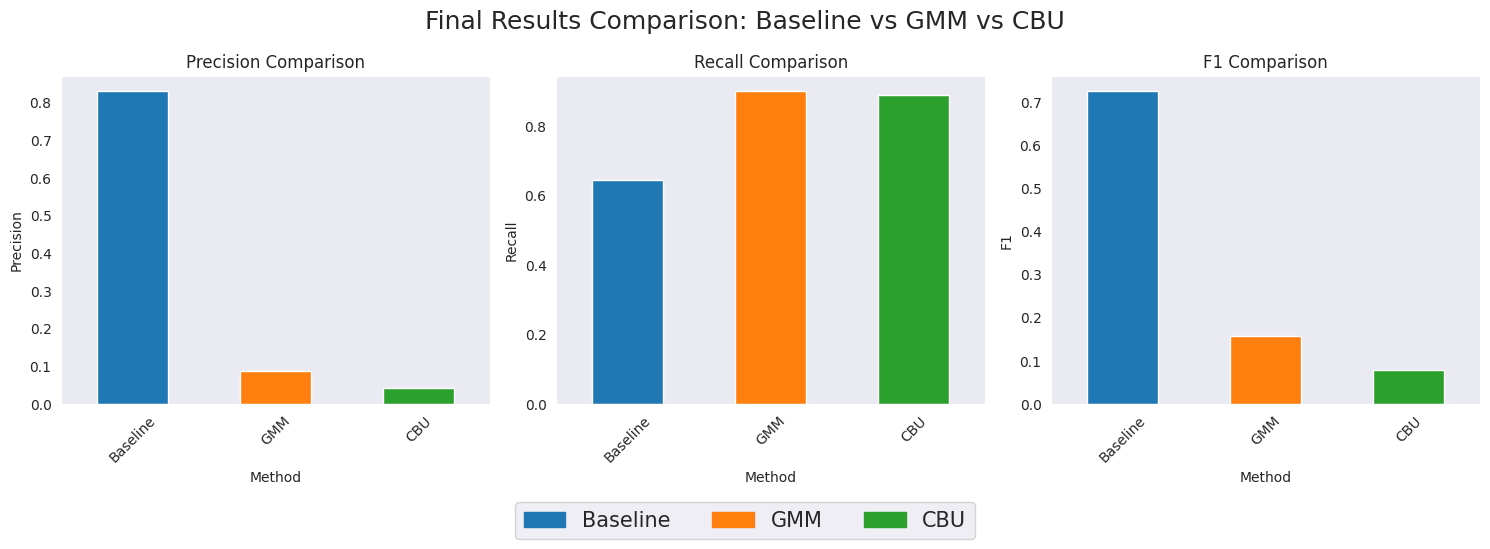

In [36]:
# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
metrics = ['Precision', 'Recall', 'F1']

for i, metric in enumerate(metrics):
    results_df.loc[metric].plot(kind='bar', ax=axes[i], color=['C0', 'C1', 'C2'])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Method')
    axes[i].tick_params(axis='x', rotation=45)

fig.suptitle('Final Results Comparison: Baseline vs GMM vs CBU', fontsize=18)
patch1 = mpatches.Patch(color='C0', label='Baseline')
patch2 = mpatches.Patch(color='C1', label='GMM')
patch3 = mpatches.Patch(color='C2', label='CBU')
fig.legend(handles=[patch1, patch2, patch3], loc = 'lower center', ncol=3, labelspacing=1, bbox_to_anchor = (0.5, -0.10), fontsize=15)
plt.tight_layout()
plt.show()

### **C.3 CONCLUSIONS AND RECCOMENDATIONS**

- **Precision** : Synthetic data generation using GMM  and CBU based resampling decrease the precision a lot compared to baseline. That results in hgher number of false positives. But in fraud detection precision is not a very important factor.
- **F1 score** : Synthetic data generation using GMM  and CBU based resampling decrease the F1 score a lot compared to baseline..
- **Recall** :  Synthetic data generation using GMM improves recall drastically from 0.65 (baseline) to 0.89, CBU also performs similarly with a recall of 0.88. This decrease the number of false negatives and is thus a crucial improvement in fraud detection as it does not allow fraudulent transactions to pass undetected.

**RECCOMENDATION**

GMM based synthetic data generation improves the recall significantly preventing fraudulent transactions from going past undetected. Eveenthough this is at the cost of precision compared to baseline, it is worth it. Eventhough CBU based resampling gives similar recall performance it has much lower precision than GMM based synthetic data generation.

I would reccomend **GMM for synthetic data generation** for the case of fraudulent transaction detection.